In [ ]:
/orions4-zfs/projects/optas/DATA/Meshes/Shape_Net_Core/2015_Summer_From_Manifolds/20000/04099429/

In [125]:
test_mesh = '/orions4-zfs/projects/optas/DATA/Meshes/Shape_Net_Core/2015_Summer_From_Manifolds/20000/02858304/10212c1a94915e146fc883a34ed13b89/model.obj'

In [126]:
from geo_tool import Mesh, Point_Cloud
import geo_tool.solids.mesh_cleaning as cleaning
import numpy as np

def pc_sampler(mesh_file, n_samples, swap_y_z=True, dtype=np.float32):
    ''' Given a mesh, it computes a point-cloud that is uniformly sampled
    from its area elements.
    '''
    in_mesh = Mesh(file_name=mesh_file)
    model_id = mesh_file.split('/')[-2]
    if swap_y_z:
        in_mesh.swap_axes_of_vertices([0, 2, 1])
    in_mesh = cleaning.clean_mesh(in_mesh)
    ss_points, _ = in_mesh.sample_faces(n_samples)
    pc = Point_Cloud(points=ss_points.astype(dtype))
    pc.center_in_unit_sphere()
    pc, _ = pc.lex_sort()
    return pc, in_mesh

In [127]:
pc1, in_mesh = pc_sampler(test_mesh, 2048)
pc2, _ = pc_sampler(test_mesh, 2048)
pc3, _ = pc_sampler(test_mesh, 2048)

print in_mesh

Mesh with 32078 vertices and 64160 triangles.


In [128]:
%matplotlib inline

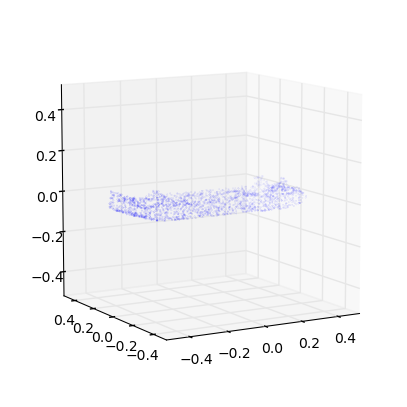

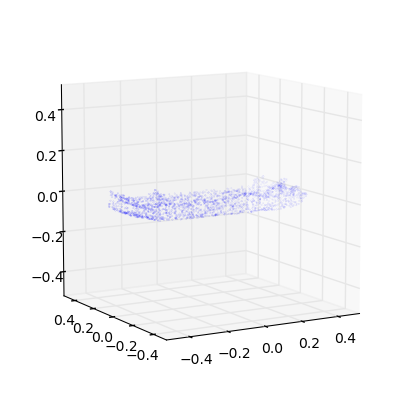

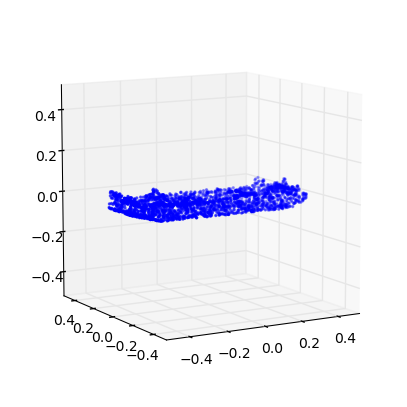

In [135]:
pc1.plot(s=0.03);
pc2.plot(s=0.03);
pc3.plot();

In [121]:
from geo_tool.in_out.soup import load_crude_point_cloud
def fps_loader(in_f):
    pc = load_crude_point_cloud(in_f)
    pc = Point_Cloud(pc).permute_points([0,2,1]).points
    syn_id = in_f.split('/')[-3]
    model_name = in_f.split('/')[-2]
    return pc, model_name, syn_id

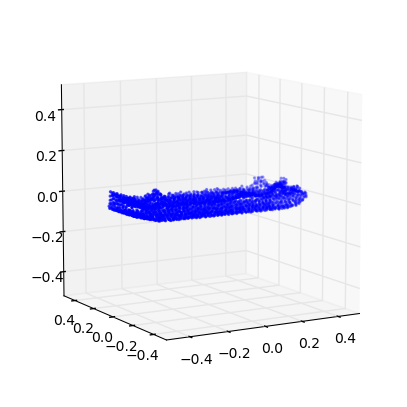

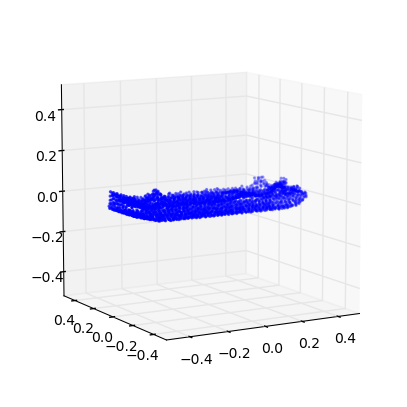

In [134]:
Point_Cloud(fps_loader('/orions4-zfs/projects/optas/DATA/skata.pts')[0]).plot()

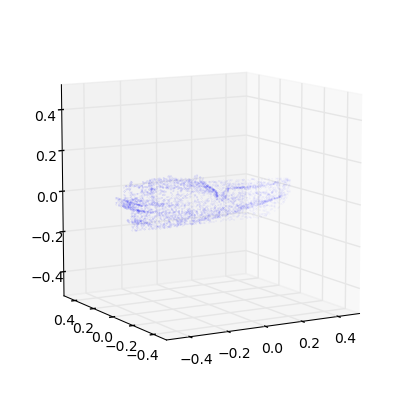

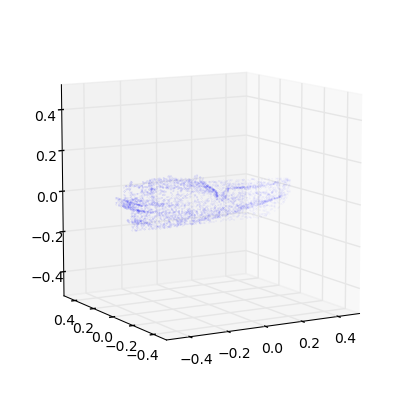

In [91]:
idx = np.arange(len(in_mesh.vertices))
rid = np.random.choice(idx, 4096, replace=False)
Point_Cloud(in_mesh.vertices[rid]).plot(s=0.01)

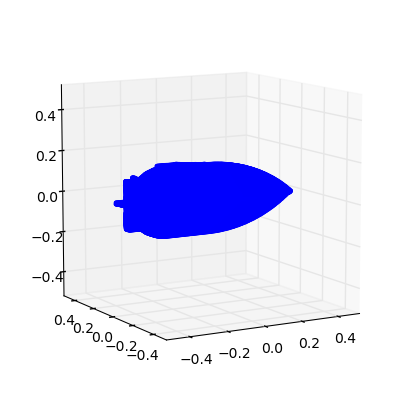

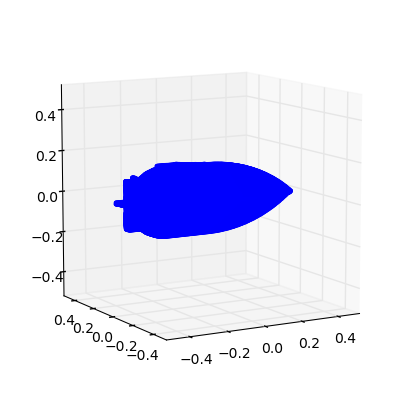

In [86]:
in_m = Mesh(file_name=test_mesh)
in_m.vertices= Point_Cloud.center_points(in_m.vertices, center='unit_sphere')
Point_Cloud(in_m.vertices).plot()